In [140]:
import numpy as np
from datetime import datetime

In [141]:
# 文件读写
# eye函数构建单位矩阵
i2 = np.eye(2, dtype="int32")
i2

array([[1, 0],
       [0, 1]])

In [142]:
np.savetxt("eye.txt", i2)

In [143]:
# 读入CSV文件
# unpack是分拆的意思，分别将两个数组赋给两个变量
c, v = np.loadtxt('apple.csv',skiprows=1, delimiter=',', usecols=(1, 2), unpack=True, encoding="utf-8")
c, v

(array([213.43, 214.6 , 214.38, ..., 117.52, 116.45, 116.65]),
 array([214.5   , 215.59  , 215.23  , ..., 118.0166, 117.1095, 117.2   ]))

In [144]:
#算术平均值函数
np.mean(c)

313.0745002837685

In [145]:
# 最大值和最小值
np.max(c), np.min(c)

(702.41, 90.0)

In [146]:
# ptp函数返回的是数组元素的最大值和最小值之间的差值
np.ptp(c)

612.41

In [147]:
#  中位数
np.median(c)

318.23

In [148]:
# 获得排序后的数组
c2 = np.msort(c)
c2

array([ 90.  ,  90.21,  90.37, ..., 699.88, 700.26, 702.41])

In [149]:
l = len(c)
left =int( l / 2)
right =int( (l - 1) / 2)
(c2[left]+c2[right]) / 2

318.23

In [150]:
#  方差
np.var(c)

34317.18208468156

In [151]:
 np.mean((c - c.mean())**2)

34317.18208468156

In [152]:
# diff函数可以返回一个由相邻数组元素的差值构成的数组。
np.diff(c2)

array([0.21, 0.16, 0.38, ..., 0.53, 0.38, 2.15])

In [153]:
#  std函数计算标准差
np.std(c)

185.24897323516143

In [154]:
#  where函数可以根据指定的条件返回所有满足条件的数组元素的索引值。
np.where(c2 > 100)

(array([ 166,  167,  168, ..., 1759, 1760, 1761], dtype=int64),)

In [155]:
np.sqrt(4)

2.0

In [156]:
# 分析日期数据

In [157]:
def datestr2num(s): 
     return datetime.strptime(s.decode('ascii'), "%Y-%m-%d").date().weekday()
    
dates, open, high, low, close=np.loadtxt('apple.csv' ,skiprows=1,delimiter=',', usecols=(0,1,2,3,4), converters={0: 
datestr2num}, unpack=True)
dates

array([0., 1., 2., ..., 2., 3., 4.])

In [158]:
averages = np.zeros(5)
averages

array([0., 0., 0., 0., 0.])

In [159]:
# take函数可以按照索引值从数组中取出相应的元素。
for i in range(5):
    indices = np.where(dates == i)
    prices = np.take(close, indices)
    avg = np.mean(prices)
    print( "Day", i+1, "Average", avg)
    averages[i] = avg

Day 1 Average 312.17128757575756
Day 2 Average 311.72830138121543
Day 3 Average 311.6763488950276
Day 4 Average 314.5211490140845
Day 5 Average 314.54118016997165


In [160]:
# 汇总数据
# 取前三周
close = close[:16]
dates = dates[:16]

In [161]:
# 找到第一个星期一
first_monday = np.ravel(np.where(dates == 0))[0]
first_monday

0

In [162]:
weeks_indices = np.arange(first_monday, len(dates)-1)
weeks_indices = np.split(weeks_indices, 3)
weeks_indices

[array([0, 1, 2, 3, 4], dtype=int64),
 array([5, 6, 7, 8, 9], dtype=int64),
 array([10, 11, 12, 13, 14], dtype=int64)]

In [163]:
def summarize(a, o, h, l, c): 
    monday_open = o[a[0]] 
    week_high = np.max( np.take(h, a) ) 
    week_low = np.min( np.take(l, a) )
    friday_close = c[a[-1]]
    return("APPL", monday_open, week_high, week_low, friday_close)

In [164]:
# apply_along_axis函数会调用另外一个由我们给出的函数，作用于每一个数组元素上。
weeksummary = np.apply_along_axis(summarize, 1, weeks_indices, open, high, low, close)

In [165]:
# savetxt函数，将数据保存至文件
np.savetxt("weeksummary.csv", weeksummary, delimiter=",", fmt="%s")

In [166]:
# maximum函数
import sys 
h, l, c = np.loadtxt('data.csv', delimiter=',', skiprows=1, usecols=(1, 2, 3), unpack=True) 

N = 3
h = h[-N:] 
l = l[-N:] 

print( "len(h)", len(h), "len(l)", len(l) )
print ("Close", c )
previousclose = c[-N -1: -1] 

print( "len(previousclose)", len(previousclose) )
print ("Previous close", previousclose )
truerange = np.maximum(h - l, h - previousclose, previousclose - l) 

print ("True range", truerange )

atr = np.zeros(N) 

atr[0] = np.mean(truerange) 

for i in range(1, N): 
    atr[i] = (N - 1) * atr[i - 1] + truerange[i] 
    atr[i] /= N 
    
print ("ATR", atr)

len(h) 3 len(l) 3
Close [212.38 213.25 210.75 ... 116.2  116.4  115.43]
len(previousclose) 3
Previous close [116.49 116.2  116.4 ]
True range [1.03 0.25 0.25]
ATR [0.51       0.42333333 0.36555556]


(array([214.01 , 214.38 , 210.97 , 210.58 , 211.98 , 210.11 , 207.72 ,
        210.65 , 209.43 , 205.93 , 215.04 , 211.725, 208.072, 197.75 ,
        203.075, 205.94 , 207.884, 199.29 , 192.063, 194.73 , 195.86 ,
        199.23 , 192.05 , 195.46 , 194.12 , 196.19 , 195.116, 198.67 ,
        200.38 , 203.4  ]),
 array([212.384 , 211.604 , 210.272 , 210.208 , 209.978 , 208.768 ,
        209.754 , 210.555 , 210.0394, 207.7034, 207.1324, 205.3124,
        204.5442, 202.7878, 201.6504, 199.9814, 197.9654, 196.2346,
        194.7866, 195.466 , 195.344 , 195.41  , 194.5872, 195.9112,
        196.8952, 198.7512]),
 26)

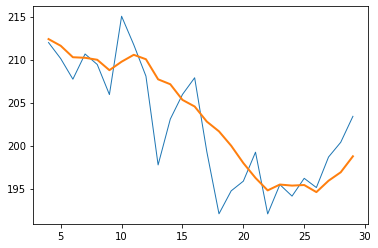

In [167]:
# 简单移动平均线
# 简单移动平均线只不过是计算与等权重的指示函数的卷积，当然，也可以是不等权重的
# 卷积是分析数学中一种重要的运算，
# 定义为一个函数与经过翻转和平移的另一个函数的乘积的积分。
# 使用convolve函数，计算一组数据与指定权重的卷积。
# ones函数的用法，即可以创建元素均为1的数组
# 得到权重
N = 5
weights = np.ones(N) / N

# 调用convolve函数
c = np.loadtxt('apple.csv', delimiter = ',', usecols=(4), unpack=True,skiprows=1 )
c = c[:30]
sma = np.convolve(weights, c)[N-1:-N+1] # N + M - 1 = 34

from matplotlib import pyplot as pt
t = np.arange(N - 1, len(c))
pt.plot(t,c[N-1:], lw=1.0)
pt.plot(t, sma, lw=2.0)
c, sma, len(sma)

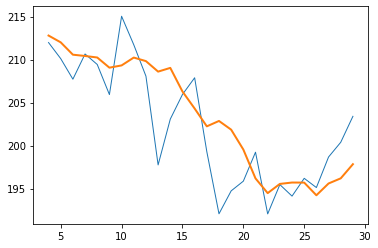

In [168]:
# 指数移动平均线
# 将在计算权重的过程中学习exp和linspace函数
# linspace函数需要一个起始值和一个终止值参数，以及可选的元素个数的参数，
# 它将返回一个元素值在指定的范围内均匀分布的数组。
x = np.arange(5)
x = np.exp(x)
x, np.linspace(-1, 0, 5)

N = 5
weights = np.exp(np.linspace(-1., 0., N))

# 对权重值进行归一化处理
weights /= weights.sum()
c = np.loadtxt('apple.csv', delimiter=',', usecols=(4), unpack=True, skiprows=1)
c = c[:30]
ema = np.convolve(weights, c)[N-1:-N+1]
t = np.arange(N - 1, len(c))
pt.plot(t, c[N-1:], lw = 1.0)
pt.plot(t, ema, lw=2.0)

[196.8952 196.8952 196.8952 196.8952 196.8952]
[198.7512 198.7512 198.7512 198.7512 198.7512]
[212.384 212.384 212.384 212.384 212.384]
[211.604 211.604 211.604 211.604 211.604]
[210.272 210.272 210.272 210.272 210.272]
[210.208 210.208 210.208 210.208 210.208]
[209.978 209.978 209.978 209.978 209.978]
[208.768 208.768 208.768 208.768 208.768]
[209.754 209.754 209.754 209.754 209.754]
[210.555 210.555 210.555 210.555 210.555]
[210.0394 210.0394 210.0394 210.0394 210.0394]
[207.7034 207.7034 207.7034 207.7034 207.7034]
[207.1324 207.1324 207.1324 207.1324 207.1324]
[205.3124 205.3124 205.3124 205.3124 205.3124]
[204.5442 204.5442 204.5442 204.5442 204.5442]
[202.7878 202.7878 202.7878 202.7878 202.7878]
[201.6504 201.6504 201.6504 201.6504 201.6504]
[199.9814 199.9814 199.9814 199.9814 199.9814]
[197.9654 197.9654 197.9654 197.9654 197.9654]
[196.2346 196.2346 196.2346 196.2346 196.2346]
[194.7866 194.7866 194.7866 194.7866 194.7866]
[195.466 195.466 195.466 195.466 195.466]
[195.344 19

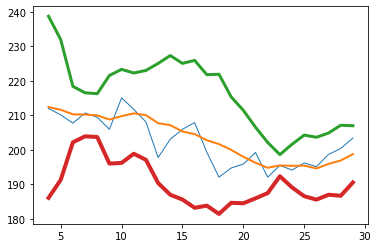

In [169]:
#  布林带
#fill函数可以将数组元素的值全部设置为一个指定的标量值
deviation = []
C = len(c)
for i in range(N - 1, C):
    if i+N < C:
        dev = c[i: i+N]
    else:
        dev = c[-N:]
        
    averages = np.zeros(N)
    averages.fill(sma[i - N - 1])
    print(averages)
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
    
deviation = 2 * np.array(deviation) 
upperBB = sma + deviation 
lowerBB = sma - deviation
c_slice = c[N-1:]

t = np.arange(N - 1, C) 
pt.plot(t, c_slice, lw=1.0) 
pt.plot(t, sma, lw=2.0) 
pt.plot(t, upperBB, lw=3.0) 
pt.plot(t, lowerBB, lw=4.0) 

In [170]:
# 线性模型
b = c[-N:]
A = np.zeros((N, N), float)
for i in range(N):
    A[i, ] = c[-N - 1 - i : -1 - i]
# 系数向量x、一个残差数组、A的秩以及A的奇异值。
(x, residuals, rank, s) = np.linalg.lstsq(A, b)
print(x, residuals, rank, s)
np.dot(b, x)

[ 0.91115968  0.24107262  0.0989917   1.24064724 -1.46608747] [] 5 [978.16245365   7.07677779   5.84749469   1.95816494   1.3653355 ]


<ipython-input-170-9b9ea75930ee>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (x, residuals, rank, s) = np.linalg.lstsq(A, b)


195.86292765857647

[ True  True  True  True  True  True  True  True  True  True False False
  True False  True  True  True  True False False  True  True False  True
  True  True  True  True  True False]
[209.06305749 208.33268678 207.60231607 206.87194537 206.14157466
 205.41120395 204.68083324 203.95046253 203.22009183 202.48972112
 200.29860899 198.83786758 198.10749687 197.37712616 196.64675545
 194.45564333 193.72527262 192.2645312  191.53416049 190.80378979
 190.07341908 189.34304837 188.61267766]
[214.01  214.38  210.97  210.58  211.98  210.11  207.72  210.65  209.43
 205.93  208.072 203.075 205.94  207.884 199.29  195.86  199.23  195.46
 194.12  196.19  195.116 198.67  200.38 ]
[218.60803125 217.95939937 217.31076748 216.66213559 216.01350371
 215.36487182 214.71623993 214.06760804 213.41897616 212.77034427
 210.82444861 209.52718483 208.87855295 208.22992106 207.58128917
 205.63539351 204.98676162 203.68949785 203.04086596 202.39223407
 201.74360219 201.0949703  200.44633841]
23 0.766666666666666

<ipython-input-171-673fce07efbf>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, y)[0]


(array([214.01 , 214.38 , 210.97 , 210.58 , 211.98 , 210.11 , 207.72 ,
        210.65 , 209.43 , 205.93 , 215.04 , 211.725, 208.072, 203.075,
        205.94 , 207.884, 199.29 , 195.86 , 199.23 , 195.46 , 194.12 ,
        196.19 , 195.116, 198.67 , 200.38 , 203.4  ]),
 array([214.01 , 214.38 , 210.97 , 210.58 , 211.98 , 210.11 , 207.72 ,
        210.65 , 209.43 , 205.93 , 208.072, 197.75 , 203.075, 205.94 ,
        207.884, 199.29 , 192.063, 194.73 , 195.86 , 199.23 , 192.05 ,
        195.46 , 194.12 , 196.19 , 195.116, 198.67 , 200.38 ]))

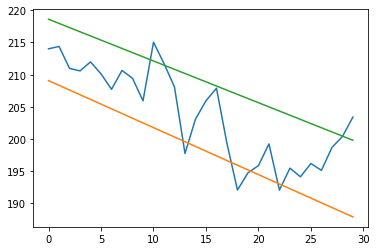

In [171]:
# 趋势线
h, l, c = np.loadtxt('data.csv', skiprows=1, delimiter=',', usecols=(2, 3, 4), unpack=True)
h = h[:30]
l = l[:30]
c = c[:30]
pivots = (h + l + c) / 3

# 定义一个函数用直线y= at + b来拟合数据，该函数应返回系数a和b
def fit_line(t, y): 
    A = np.vstack([t, np.ones_like(t)]).T 
    return np.linalg.lstsq(A, y)[0]

t = np.arange(len(c)) 
sa, sb = fit_line(t, pivots - (h - l)) 
ra, rb = fit_line(t, pivots + (h - l)) 
support = sa * t + sb 
resistance = ra * t + rb

condition = (c > support) & (c < resistance)
print(condition)
between_bands = np.where(condition)
print(support[between_bands])
print(c[between_bands])
print( resistance[between_bands])

between_bands = len(np.ravel(between_bands))
print(between_bands, float(between_bands)/len(c))

# 预测下一个交易日的阻力位和支持位
print( "Tomorrows support", sa * (t[-1] + 1) + sb)
print( "Tomorrows resistance", ra * (t[-1] + 1) + rb)

a1 = c[c > support] 
a2 = c[c < resistance]
print( "Number of points between bands 2nd approach" ,len(np. intersect1d(a1, a2)))
pt.plot(t, c) 
pt.plot(t, support) 
pt.plot(t, resistance)
a1, a2

In [176]:
# 数组的修剪和压缩
# ndarray类定义了许多方法，可以在数组对象上直接调用。
# 通常情况下，这些方法会返回一个数组。
# clip方法返回一个修剪过的数组
# 将所有比给定最大值还大的元素全部设为给定的最大值，
# 而所有比给定最小值还小的元素全部设为给定的最小值
a = np.arange(5)
print(a.clip(1, 2))

# compress方法返回一个根据给定条件筛选后的数组
a = np.arange(4)
print(a.compress(a > 2))

[1 1 2 2 2]
[3]


In [179]:
#  阶乘
# prod方法可以计算数组中所有元素的乘积
b = np.arange(1, 9)
print(b.prod())

#  cumprod方法，计算数组元素的累积乘积。
b.cumprod()

40320


array([    1,     2,     6,    24,   120,   720,  5040, 40320],
      dtype=int32)